### Get Ticker Universe

In [33]:
import creds
import ccxt.async_support as ccxt
upbit = ccxt.upbit(config={'apiKey': creds.upbit_api_key, 'secret': creds.upbit_api_secret, 'enableRateLimit': False})
binance = ccxt.binance(config={'apiKey':creds.api_key, 'secret': creds.api_secret, 'enableRateLimit': False})


upbit requires to release all resources with an explicit call to the .close() coroutine. If you are using the exchange instance with async coroutines, add `await exchange.close()` to your code into a place when you're done with the exchange and don't need the exchange instance anymore (at the end of your async coroutine).
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x1684c45e0>
binance requires to release all resources with an explicit call to the .close() coroutine. If you are using the exchange instance with async coroutines, add `await exchange.close()` to your code into a place when you're done with the exchange and don't need the exchange instance anymore (at the end of your async coroutine).
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x1565dfc10>


In [34]:
upbit_markets = await upbit.fetch_markets()
upbit_markets = [market['base'] for market in upbit_markets if market['quote']=='KRW']

bn_markets = await binance.fetch_markets()
bn_spot_markets= [market['base'] for market in bn_markets if market['quote']=='USDT' and market['spot']]
bn_futures_markets= [market['base'] for market in bn_markets if market['quote']=='USDT' and market['swap']]

In [35]:
temp = []
for ticker in bn_spot_markets:
    if ticker in bn_futures_markets:
        temp.append(ticker)
    elif '1000'+ticker  in bn_futures_markets:
        print('1000'+ticker)
        temp.append(ticker)
    elif ticker in ['LUNA', 'DODO', 'BEAM']:
        print(ticker)
        temp.append(ticker)
bn_markets = temp

BEAM
LUNA
DODO
1000SHIB
1000XEC
1000LUNC
1000PEPE
1000FLOKI
1000BONK


In [36]:
universe = []
for ticker in upbit_markets:
    if ticker in bn_markets:
        universe.append(ticker)
len(universe)

90

### Download all ohlcv files

In [37]:
from BinanceDownloader import BinanceDownloader
from UpbitDownloader import UpbitDownloader
bd = BinanceDownloader()
ud = UpbitDownloader(rotate_ip = True)

Starting API gateway in 1 regions.
Using 1 endpoints with name 'https://api.upbit.com - IP Rotate API' (0 new).


In [39]:
import asyncio
from tqdm import tqdm

start_date = "2023-07-01"

for i,ticker in tqdm(enumerate(universe)):
    df = await bd.get_ohlcv_monthly_full(ticker+'USDT', '5m', 'spot', start_date = start_date, num_threads = 10, output_dir = 'ohlcv_data/binance/')
    # df = await ud.get_ohlcv_full(ticker, 5, start_datetime = start_date, output_dir = 'ohlcv_data/upbit/', num_threads = 10, sleep = 0, rotate_ip=True)
    if df is not None:
        print(i,ticker, df.Time.iloc[0], df.Time.iloc[-1])
    else:
        print(i,ticker, 'yielded none')


0it [00:01, ?it/s]

BEAMXUSDT_spot_5m.csv done
0 BTC 2023-11-14 08:00:00+00:00 2024-06-30 23:55:00+00:00


### Collect Samples

In [6]:
import pandas as pd
import numpy as np
import asyncio
import matplotlib.pyplot as plt
async def get_premium (ticker, btc_premium):
    target_bn = await bd.get_ohlcv_daily_single(ticker + 'USDT', date, '15m', 'spot', num_days, use_async = False)
    target_up = await ud.get_daily_ohlcv(ticker, date, '15m', num_days, use_async= False)

    if target_up is not None and target_bn is not None:
        if len(target_bn) == len(target_up) and len(target_bn) == len(btc_bn):
            target_premium = target_up.Close.values/target_bn.Close.values
            relative_premium = target_premium /btc_premium-1
            relative_premium = pd.Series(relative_premium, index = target_up.index)
            if max(abs(relative_premium))> 0.005:
                relative_premium.plot(label='ticker')



start_date = pd.to_datetime("2024-07-31", utc=True)
date = start_date
num_days = 1
while date > start_date - pd.Timedelta(days=100):
    btc_bn = await bd.get_ohlcv_daily_single('BTCUSDT', date, '15m', 'spot', num_days, use_async = False )
    btc_up = await ud.get_daily_ohlcv('BTC', date, '15m', num_days, use_async= False)
    btc_premium = btc_up.Close.values/btc_bn.Close.values

    tasks = [get_premium(ticker, btc_premium) for ticker in universe]
    await asyncio.gather(*tasks)
    plt.legend()
    plt.show()
    date -= pd.Timedelta(days=1)


Error with download_df: File is not a zip file
Error with download_df: File is not a zip file


In [7]:
universe

['ETH',
 'NEO',
 'MTL',
 'XRP',
 'ETC',
 'SNT',
 'WAVES',
 'XEM',
 'QTUM',
 'LSK',
 'STEEM',
 'XLM',
 'ARK',
 'STORJ',
 'ADA',
 'POWR',
 'ICX',
 'EOS',
 'TRX',
 'SC',
 'ONT',
 'ZIL',
 'POLYX',
 'ZRX',
 'LOOM',
 'BCH',
 'BAT',
 'IOST',
 'CVC',
 'IOTA',
 'HIFI',
 'ONG',
 'GAS',
 'KNC',
 'BSV',
 'THETA',
 'MANA',
 'ANKR',
 'ATOM',
 'WAXP',
 'HBAR',
 'STPT',
 'VET',
 'CHZ',
 'STMX',
 'KAVA',
 'LINK',
 'XTZ',
 'SXP',
 'DOT',
 'STRAX',
 'GLM',
 'SAND',
 'DOGE',
 'FLOW',
 'AXS',
 'STX',
 'XEC',
 'SOL',
 'MATIC',
 'AAVE',
 '1INCH',
 'ALGO',
 'NEAR',
 'AVAX',
 'T',
 'CELO',
 'GMT',
 'APT',
 'SHIB',
 'MASK',
 'ARB',
 'EGLD',
 'SUI',
 'GRT',
 'BLUR',
 'IMX',
 'SEI',
 'MINA',
 'ASTR',
 'ID',
 'PYTH',
 'AUCTION',
 'STG',
 'BEAM',
 'ZRO',
 'JUP',
 'ENS']

Trader successfully initialized.


In [7]:
import matplotlib.pyplot as plt

ticker = 'STRAX'
timeframe = '30m'
numbars = 48*4
date = pd.to_datetime("2024.01.31 00:00", utc=True)

In [10]:
# while date < pd.to_datetime("2024-08-05 00:00", utc=True):
since = int(date.timestamp()*1000)

try:
    krw = await upbit.fetch_ohlcv(f'{ticker}/KRW', timeframe, numbars, since)
    usdt = await binance.fetch_ohlcv(f'{ticker}/USDT', timeframe, numbars, since)
    upbit_premium = krw['Close']/usdt['Close']-1

    krw = await upbit.fetch_ohlcv(f'BTC/KRW', timeframe, numbars, since)
    usdt = await binance.fetch_ohlcv(f'BTC/USDT', timeframe, numbars, since)
    binance_premium = krw['Close']/usdt['Close']-1
except:
    pass

premium = (upbit_premium/binance_premium-1)
max_premium = max(abs(premium))
print(date,max_premium)

if max_premium>0.025:
    premium.plot(title=f'{ticker} premium',marker='o', figsize = (14,6));plt.show()

date += pd.Timedelta(days=4)


NameError: name 'upbit_premium' is not defined

2024-08-05 00:00:00+00:00 0.06776223890182242


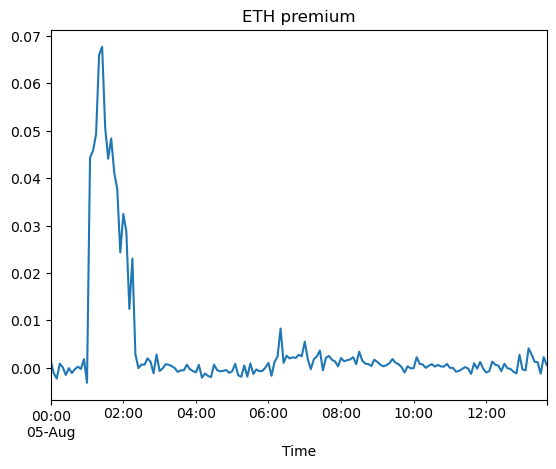

In [190]:
# while True:
since = int(date.timestamp()*1000)

upbit_price = await upbit.fetch_ohlcv(f'{ticker}/KRW', timeframe, numbars, since)
binance_price = await binance.fetch_ohlcv(f'{ticker}/USDT', timeframe, numbars, since)
premium = upbit_price['Close']/binance_price['Close']-1

usdt = (await upbit.fetch_ohlcv('USDT/KRW', timeframe, numbars, since))['Close']
premium = (premium/usdt-1)
max_premium = max(abs(premium))
print(date, max_premium)
# if max_premium>0.02:
premium.plot(title=f'{ticker} premium');plt.show()
# date += pd.Timedelta(days=1)